# 주요 단계
### 0. 필요한 라이브러리 import 및 셋팅

### 1. Data Load 및 Data Set 확인
* 데이터 타입 확인
* null data 확인
* target label 확인

### 2. EDA(탐험적 데이터 분석)
* 변수 개별 분석, 시각화를 통한 insight 추출
* 변수 별 null data 확인
* outlier 확인

### 3. Preprocessing(전처리)
* null data 대체, 이상치 처리
* Feature Engineering(Label Encoding / one-hot encoding)

### 4. Model Building
* 사용할 feature 결정/상관계수 확인 및 train_X, train_y, test_X 로 구분
* Cross Validation을 통한 모델 성능 평가
* 기타 여러 모델 사용하여 비교(추후 업데이트)

### 5. Fitting and Prediction
* train set으로 model을 학습시키고, test set을 가지고 prediction

### 6. Submission

# 컬럼 설명

(데이터는 [다음의 링크](https://www.kaggle.com/c/titanic/data)에서 다운)

  * **Survival** - 생존 여부. 0이면 사망, 1이면 생존한 것으로 간주함
  * **Pclass** - 티켓 등급. 1등석(1), 2등석(2), 3등석(3)이 있으며, 1등석일수록 좋고 3등석일수록 좋지 않음
  * **Sex** - 성별. 남자(male)와 여자(female)이 있음
  * **Age** - 나이. 틈틈히 빈 값이 존재하며, 소수점 값도 존재함
  * **SibSp** - 해당 승객과 같이 탑승한 형재/자매(siblings)와 배우자(spouses)의 총 인원 수
  * **Parch** - 해당 승객과 같이 탑승한 부모(parents)와 자식(children)의 총 인원 수
  * **Ticket** - 티켓 번호 다양한 텍스트(문자열)로 구성
  * **Fare** - 운임 요금. 소수점으로 구성되어 있음
  * **Cabin** - 객실 번호. 많은 빈 값이 존재하며, 다양한 텍스트(문자열)로 구성되어 있음
  * **Embarked** - 선착장. C는 셸부르(Cherbourg)라는 프랑스 지역, Q는 퀸스타운(Queenstown)이라는 아일랜드 지역, S는 사우스햄튼(Southampton)이라는 영국 지역.

# 0. 필요한 라이브러리 import 및 셋팅

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# plt.style.use('seaborn')   # 필요시 셋팅. matplotlib의 기본 scheme말고, seaborn의 scheme을 세팅
# sns.set(font_scale = 2.5)  # 위와 같이 셋팅. 일일이 그래프의 폰트 사이즈 지정 필요 없이, seaborn의 폰트 스케일을 사용하면 편리함

import missingno as msno    # null data(NaN으로 표기된) 시각화. 

import warnings
warnings.filterwarnings('ignore')  # 시각화 시 불필요하게 뜨는 경고창을 안 나오게 함

%matplotlib inline  
# 노트북 내에서 그래프 표시

# 1. Data 로드 및 확인 

In [2]:
train = pd.read_csv('train.csv', index_col = 'PassengerId')   # PassengerId를 기준 행으로 지정

print(train.shape)
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv('test.csv', index_col = 'PassengerId')

print(test.shape)
test.head()

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 1-1. 데이터 별 타입 확인 

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


* **train data내의 데이터 정보 확인 결과, 아래와 같이 예상 가능함**
    * ```Pclass```: 범주가 세 가지로 명확하고 결측치가 없어서 Pclass별 생존률을 본다면 의미있는 인사이트가 있을 것 
    * ```Name```: 아직 큰 의미는 없어보이나, Mr, Mrs, Ms 등으로 다양하게 되어 있으므로 이를 기준으로 생존률을 살펴볼 수도 있을 것
    * ```Sex```: 성별별 생존률은 당연히 의미있을 것이고, object 타입이므로 추후 전처리를 통해 문자열을 0, 1의 형태로 바꾸는 게 좋을 것
    * ```Age```: 값의 종류가 무수히 많으니 구간을 나누어서 생존률을 본다면 의미있을 것. 그러나 결측치가 다수 존재함을 참고할 것
        * 또한, Age임에도 불구하고 data type이 실수인 것으로 보아 Age에 소수점데이터가 있다는 것을 참고할 것
    * ```SibSp```, ```Parch```: 가족 동승자의 규모를 알 수 있으니 이를 합쳐서 본다면 의미있을 것
    * ```Ticket```: 아직 규칙을 찾지 못하겠음
    * ```Fare```: Age와 같은 연속형 변수이므로 비슷하게 분석. 또는 Pclass 등과 상관관계 및 이에 따른 사망과의 인과관계 분석
    * ```Cabin```: 아직 규칙을 찾지 못하겠음. 결측치도 지나치게 많음
    * ```Embarked```: 범주가 세 가지로 명확하고 결측치도 거의 없다고 봐도 됨. 선착장별 생존률을 볼 필요가 있어보임.

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


* **test data역시 train data와 대동소이함을 알 수 있음**

In [6]:
# train.apply(lambda x : len(x.unique())) 를 이용하여 
# 각 변수별 category도 확인할 수 있으니 참고 !

## 1-2. null data 확인 

### pandas의 메서드를 이용하여 간단한 연산만 추가하면 아래와 같이 쉽게 null 비율을 알 수 있음

In [7]:
train.isnull().sum() / len(train)

Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64

* **위를 토대로 결측치의 비율을 검토해본 결과 Age, Cabin, Embarked에서 각기 다른 비율의 결측치가 존재함을 알 수 있음**

In [8]:
test.isnull().sum() / len(test)

Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.205742
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.002392
Cabin       0.782297
Embarked    0.000000
dtype: float64

* **test data를 검토해본 결과 Age는 확실히 구간별 전처리로 필요하고, 결측치 처리방법을 고민할 필요가 있어보임**

### missingno 패키지를 이용한 null data 확인
* 위에서 이미 msno로 import 했음. 
* matrix 메서드: 1행부터 끝 행까지 순서대로 결측치가 없으면 색깔표시, 없으면 색깔없음으로 나타남 
    * 따라서 특정 열에 결측치가 많을수록 해당 열 그래프가 연하게 보임
* bar 메서드: 결측치가 많을수록 bar가 짧음
    * 바 우측은 1행부터 끝 행까지 넘버링, 바 좌측은 완전한 비율(결측치가 없으면 1.0
    * 바 상단은 입력된 데이터의 개수(전체 필요한 데이터 수 891개 - 결측치) 

<AxesSubplot:>

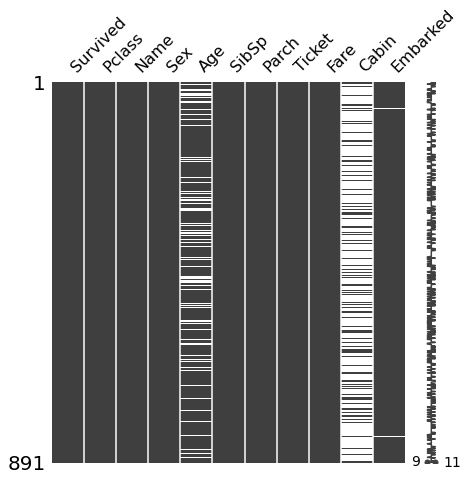

In [9]:
msno.matrix(train, figsize = (7, 7))

<AxesSubplot:>

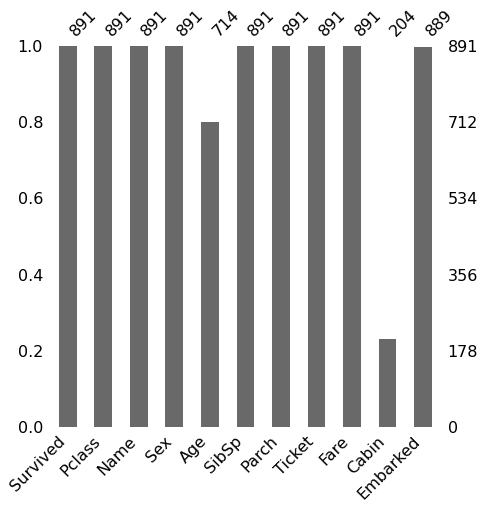

In [10]:
msno.bar(train, figsize = (7, 7))

<AxesSubplot:>

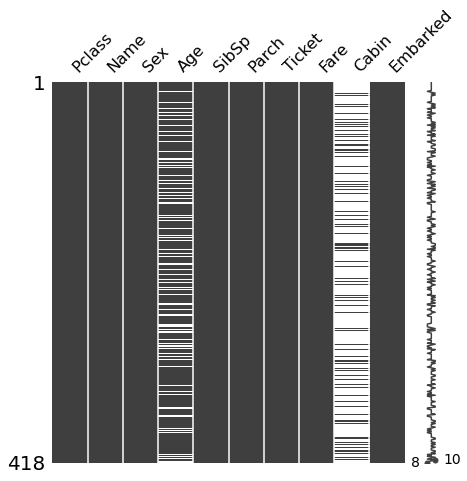

In [11]:
msno.matrix(test, figsize = (7, 7))

<AxesSubplot:>

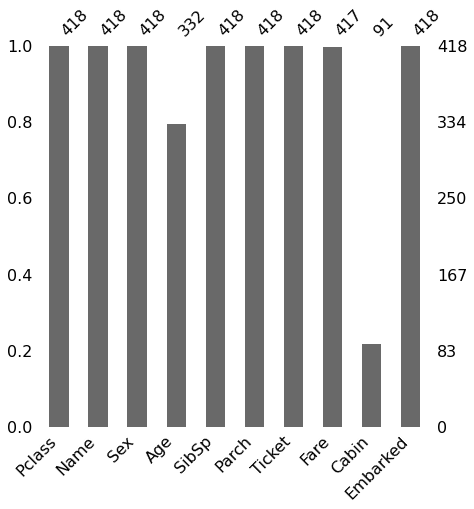

In [12]:
msno.bar(test, figsize = (7, 7))

## 1-3. taget label(Survived) 확인
* 타이타닉 데이터는 경진대회 목적이기 때문에 당연히 문제를 풀 수 있는 좋은 데이터 셋이지만,
* 실제 데이터 분석에서의 binary classification 문제의 경우 학습에 사용할 target label에서 0과 1이 어떤 분포인지 먼저 확인해야 한다.
    * 만약 train data에서 0이 1개, 1이 99개인 경우 그냥 다 1로 예측을 해버려도 정확도는 99%
    * 그런데 문제가 0을 예측하는 문제라면 모델이 이 데이터를 갖고 학습할 수 없다.

<AxesSubplot:xlabel='Survived', ylabel='count'>

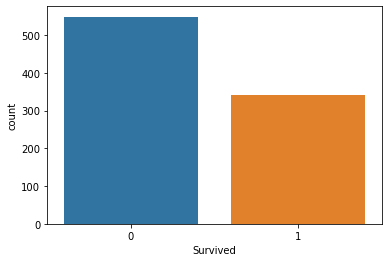

In [13]:
sns.countplot(data=train, x = 'Survived')

In [14]:
train['Survived'].value_counts() / len(train)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

* 시각화로 봐도, 비율을 계산해서 봐도 충분히 괜찮은 데이터라고 할 수 있다.

# 2. EDA

In [15]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

* **살펴볼 변수들에 대한 대략적인 계획**
    * ```Pclass```: 클래스별 생존확률 확인 후 feature로 사용 여부 결정
    * ```Name```: Mr, Mrs, Ms 등을 살펴보고 이를 분류했을 때 유의미한 결과가 있는지 살펴본 후 feature로 사용여부 결정
        * 필요 시 feature engineering할 때 one-hot encoding 수행
    * ```Sex```: 성별별 생존률을 살펴보고, 문자열을 0, 1의 형태로 바꾸어 feature로 사용할 것
    * ```Age```: 구간으로 구분하여 생존률 분석, 결측치 처리방법에 대해 고민한 뒤 feature로 사용할 것
    * ```SibSp```, ```Parch```: 이를 합쳐서 동승자의 수에 따른 생존률을 분석할 것. 유의미하다면 feature로 사용할 것
    * ```Ticket```: 일정한 규칙이 있을 지 찾아볼 것
    * ```Fare```: Age와 같은 연속형 변수이므로 비슷하게 분석. 또는 Pclass 등과 상관관계 및 이에 따른 생존/사망 연관성 분석
    * ```Cabin```: 일정한 규칙이 있을 지 찾아보고 다량의 결측치 처리방법에 따라 feature 사용 여부 결정할 것
    * ```Embarked```: 선착장별 생존률을 분석하여 유의미하다면 feature로 사용할 것. 
        * 필요 시 feature engineering할 때 one-hot encoding 수행

## 2-1. Pclass 
* **클래스별 생존확률 확인 후 feature로 사용 여부 결정**

<AxesSubplot:xlabel='Pclass', ylabel='count'>

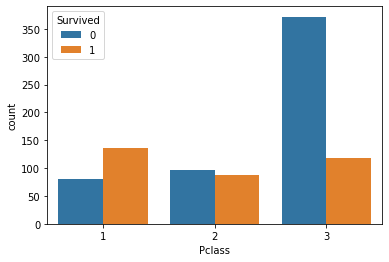

In [16]:
sns.countplot(data = train, x ='Pclass', hue = "Survived")

**시각화 결과, 예상대로 1등급의 생존수가 높음을 알 수 있음**

**좀 더 비율적으로 보기위해 피벗테이블을 이용하면,**

In [17]:
pd.pivot_table(train, index='Pclass', values = 'Survived')

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


참고: groupby로 한다면 아래와 같이 할 수 있다.

In [18]:
train[['Pclass', 'Survived']].groupby(['Pclass']).mean() 
# 만약 세가지 이상의 인덱스 결과값의 rank가 뒤죽박죽이라면 뒤에 .sort_values(by = 'Survived', ascending = False)를 쓰면 됨

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


**위와 같으며, 이를 그래프로 보면 다음과 같이 더욱 직관적으로 객실등급별 생존율을 볼 수 있다**

<AxesSubplot:xlabel='Pclass'>

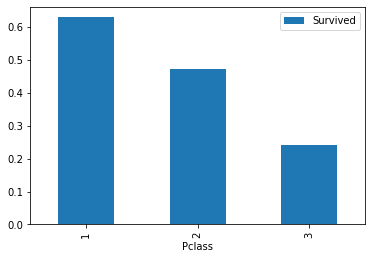

In [19]:
pd.pivot_table(train, index='Pclass', values = 'Survived').plot.bar()

**확실히 객실등급이 높을수록 생존율이 높음을 확인함**

In [20]:
pd.crosstab(train['Pclass'], train['Survived'],
            margins=True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


pandas의 crosstab을 사용하면 위와 같이 비교할 수 있다.
* Pclass 1등급으로 보면 생존이 좀 더 진하고, 3등급은 사망이 더 진함을 알 수 있다.
* 3등급을 이용해서 사망률이 높다기 보다는 실제로 타이타닉 침몰 시 3등급이 몰려있는 곳부터 침몰했기 때문임
    * [타이타닉 사고 분석 참고 클릭!](https://images.squarespace-cdn.com/content/5006453fe4b09ef2252ba068/1351660113175-514SN9PXFWB9N2MNB8DV/TItanic-Survival-Infographic.jpg?format=1500w&content-type=image%2Fjpeg)

## Pclass 결론: feature로 사용 시 모델 성능에 긍정적일 것

## 2-2. Name
* Mr, Mrs, Ms 등을 살펴보고 이를 분류했을 때 유의미한 결과가 있는지 살펴본 후 feature로 사용여부 결정

* 아래를 살펴보면, 
    * 쉼표 앞은 성(Surname), 그다음은 호칭(Title), 그다음은 이름(First name)임을 알 수 있음
    * 이를 구분하여 생존률을 분석할 필요성이 있음

In [21]:
train['Name'].head(10)

PassengerId
1                               Braund, Mr. Owen Harris
2     Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                Heikkinen, Miss. Laina
4          Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                              Allen, Mr. William Henry
6                                      Moran, Mr. James
7                               McCarthy, Mr. Timothy J
8                        Palsson, Master. Gosta Leonard
9     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

* 아직 아래의 extract 이하의 문장은 잘 해석이 안되나, 여러 시도 결과 마침표(.)가 있는 글자만 떼어오도록 한 것 같음
* 어쨌든 이를 통해 유의미한 Title은 Mr, Miss, Mrs. Master(미혼남성) 가 될 것으로 판단됨

In [22]:
train['Name'].str.extract('([a-zA-Z]+)\.', expand=False).value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Countess      1
Don           1
Sir           1
Jonkheer      1
Lady          1
Ms            1
Mme           1
Capt          1
Name: Name, dtype: int64

In [23]:
test['Name'].str.extract('([a-zA-Z]+)\.', expand=False).value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Dr          1
Ms          1
Name: Name, dtype: int64

* 참고: count는 안되지만 어떤 title들이 있는지는 아래와 같이 함수를 만들어서 확인할 수도 있음

In [24]:
def get_title(name):
    return name.split(",")[1].split(".")[0]

train['Name'].apply(get_title).unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

* 다시 돌아와서, 위의 Mr 등으로 추출한 코드를 이용하여 새 컬럼 'Title을 만들어 해당 호칭들을 할당하겠음

In [25]:
train['Title'] = train['Name'].str.extract('([a-zA-Z]+)\.')
test['Title'] = test['Name'].str.extract('([a-zA-Z]+)\.')

In [26]:
train[['Name', 'Title']].head()

,Name,Title
PassengerId,,
1,"Braund, Mr. Owen Harris",Mr
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
3,"Heikkinen, Miss. Laina",Miss
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
5,"Allen, Mr. William Henry",Mr


In [27]:
test[['Name', 'Title']].head()

,Name,Title
PassengerId,,
892,"Kelly, Mr. James",Mr
893,"Wilkes, Mrs. James (Ellen Needs)",Mrs
894,"Myles, Mr. Thomas Francis",Mr
895,"Wirz, Mr. Albert",Mr
896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",Mrs


* Title에 너무 많은 종류의 데이터가 들어가 있기 때문에 이 컬럼을 모델에 그대로 사용하면 과적합(overfitting)이 일어날 우려가 있음
* 예를 들어, train data 기준으로 Lady, Don 등 1명씩 존재하는 Title의 종류가 많음
* 이를 그대로 feature로 사용할 경우,
    * 모델이 general한 패턴을 기준으로 split하는 게 아니라, 지나치게 specific한 패턴을 불필요하게 학습하게 되며,
    * 이로 인해 오히려 모델의 예측 성능이 떨어질 수도 있음
* 이 경우, 빈도수가 적은 데이터들을 하나로 병합하는 전처리(preprocessing)과정이 필요
    * 여기서는 Mr, Mrs, Miss, Master를 제외한 나머지는 other로 처리할 것임

In [28]:
train['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer',
                        'Lady', 'Major', 'Mlle', 'Mme', 'Ms', 'Rev', 'Sir'], 'Other', inplace = True)

In [29]:
# 여기서 values = 'Name'은 큰 의미 없고 그냥 인원수를 count하기 위해 아무 컬럼명을 지정한 것이다.

pd.pivot_table(train, values = 'Name', index = 'Title', columns = 'Survived', aggfunc = 'count', margins = True)

Survived,0,1,All
Title,,,
Master,17,23,40
Miss,55,127,182
Mr,436,81,517
Mrs,26,99,125
Other,15,12,27
All,549,342,891


<AxesSubplot:xlabel='Title', ylabel='count'>

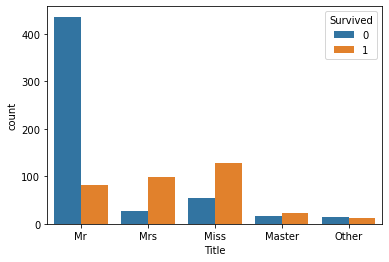

In [30]:
sns.countplot(data = train, x = 'Title', hue = 'Survived')

* 여성은 Title에 상관없이 전부 생존률이 높다.


* 특이사항은, 같은 남성인데도 Master(남자 어린이)의 생존률이 높으므로 다음과 같은 추가 분석 계획을 생각할 수 있다.
    * 일단 Title을 feature로 사용해서 모델을 구현해보고, 
    * 나중에는 Title이 아닌, Master 여부에 따라 True or False를 입력하는 컬럼을 새로 만들어서 이를 feature로 사용해봐도 좋겠다.

test data의 Title도 아래와 같이 처리해준다

In [31]:
test['Title'].replace(['Col', 'Dona', 'Dr', 'Ms', 'Rev'], 'Other', inplace = True)

## Name 결론: 
* **Name컬럼에서 추출한 Title컬럼을 사용할 것이다.**
* **Title 컬럼을 feature로 사용 가능하나, Sex와 내용이 겹쳐서 과적합이 발생할 우려가 있으니 사용 / 비사용의 결과 비교 필요**

## 2-3. Sex
* **예상: female일 경우의 생존확률이 높을 것?**

<AxesSubplot:xlabel='Sex', ylabel='count'>

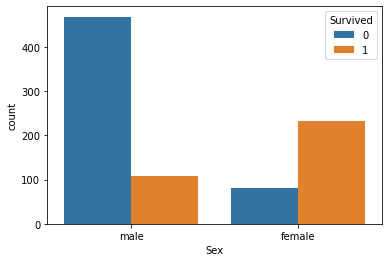

In [32]:
sns.countplot(data = train, x = 'Sex', hue = 'Survived')

In [33]:
pd.pivot_table(train, index = 'Sex', values = 'Survived')

,Survived
Sex,
female,0.742038
male,0.188908


In [34]:
train[['Sex', 'Survived']].groupby(['Sex']).mean() 
# 만약 세가지 이상의 인덱스 결과값의 rank가 뒤죽박죽이라면 뒤에 .sort_values(by = 'Survived', ascending = False)를 쓰면 됨

,Survived
Sex,
female,0.742038
male,0.188908


<AxesSubplot:xlabel='Sex'>

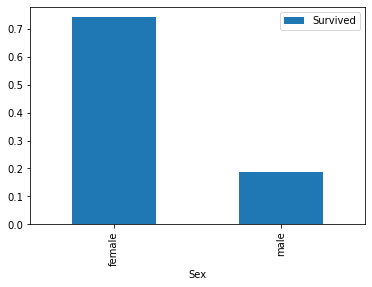

In [35]:
pd.pivot_table(train, index = 'Sex', values = 'Survived').plot.bar()

In [36]:
pd.crosstab(train['Sex'], train['Survived'], margins = True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


## Sex 결론: 
* **feature로 사용 시 모델성능에 긍정적일 것**
* **모델에 학습시킬 수 있도록 추후 0, 1로 label encoding, 또는 one-hot encoding 필요해 보임**

## ※ Pclass & Sex 

* 아래의 세 가지 방법중 하나로 Pclass와 Sex간의 특이한 관계는 없는 지 확인할 수 있다.

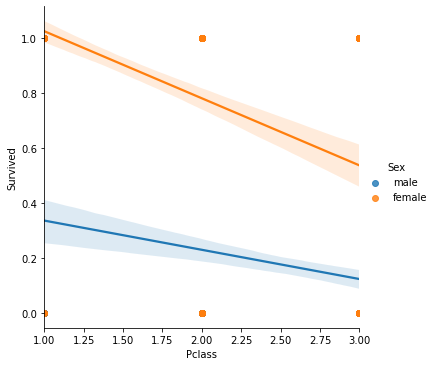

In [37]:
sns.lmplot(data = train, x = 'Pclass', y = 'Survived', hue = 'Sex')

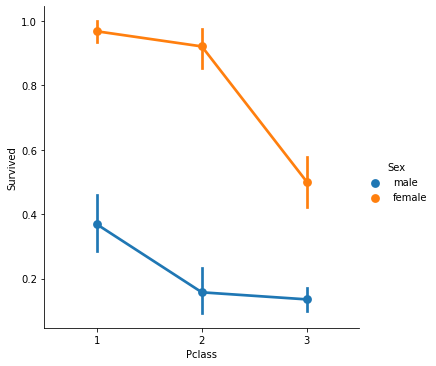

In [38]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = train)

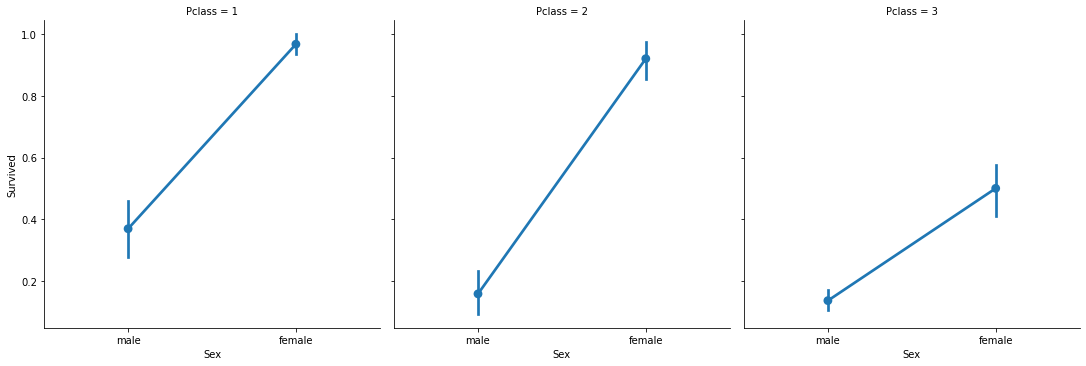

In [39]:
sns.factorplot(x = 'Sex', y = 'Survived', col = 'Pclass', data = train)

* **모든 클래스에서 여성의 생존확률이 더 높으며**
* **남녀 상관없이 클래스가 높을수록 생존확률이 더 높음**
* **특이한 관련성은 발견되지 않음**

## 2-4. Age
* **구간으로 구분하여 생존률 분석, 결측치 처리방법에 대해 고민한 뒤 feature로 사용할 것**

* Age컬럼은 언뜻 보기에도 중요한 변수로 보임에도 불구하고 결측치가 많은데,
    * train데이터 기준으로 총 891개의 데이터 중 177개가 NaN이다.
    * 이를 잘 처리한다면 모델 성능에 긍정적인 feature로 사용할 수 있을 것이다.
        * step1: Age 통계량 파악
        * step2: Age별 생존분포 파악 + Pclass별 나이 분포 + Age 누적 생존률
        * step3: 결측치 채울 아이디어

In [40]:
train['Age'].isnull().sum()

177

In [41]:
train['Age'].isnull().sum()/len(train)

0.19865319865319866

### step1: 나이 통계량 파악
* 최대값: 80세
* 최소값: 0.4세
* 평균값: 29.7세

In [42]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### step2: Age별 생존분포 파악 + Pclass별 나이 분포 + Age 누적 생존률
* 나이에 들어간 데이터량이 많으므로 테이블보다는 시각화로 보는 것이 더 좋을 것
    * 시각화에서도 단순 바 형태로 보면 나이 입력값이 많아 X축이 많을 뿐더러 분포를 볼 수 없다.
    * 따라서 seaborn으로 데이터의 분포를 확인할 수 있는 커널밀도추정(KDE: Kernal Density Estimator) plot을 활용 
    * 이름에서 알 수 있듯이, kdeplot은 확률밀도함수(pdf)를 나타낸다.
* [fig, ax = plt.subplots( ) 관련 참고](https://m.blog.naver.com/PostView.naver?blogId=heygun&logNo=221520454294&proxyReferer=https:%2F%2Fwww.google.com%2F)

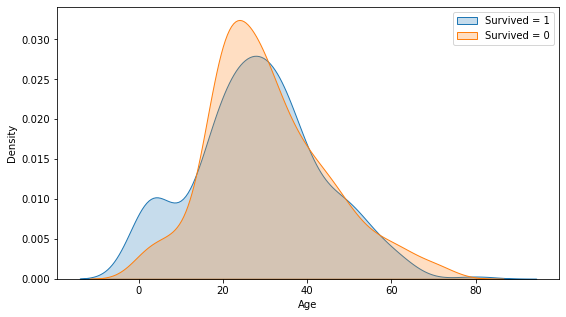

In [43]:
# Age별 생존분포

fig, ax = plt.subplots(1, 1, figsize = (9, 5))
sns.kdeplot(train[train['Survived'] == 1]['Age'], shade = True)
sns.kdeplot(train[train['Survived'] == 0]['Age'], shade = True)
plt.legend(['Survived = 1', 'Survived = 0']) 
plt.show()

* **생존자 중 나이가 어린 사람이 많음을 볼 수 있다.**
    * 만약 구간을 지정한다면, 약 15세를 기준으로 child, adult로 나눈 컬럼을 만들면 유의미한 feature로 사용할 수 있다.

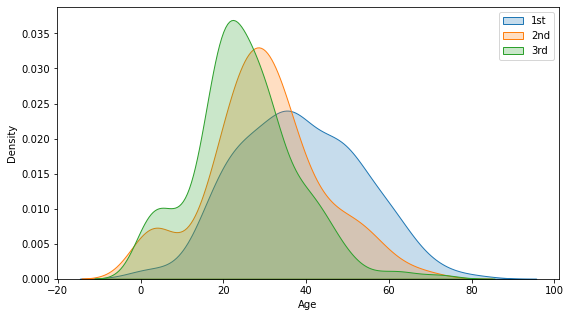

In [44]:
# Pclass별 나이 분포

fig, ax = plt.subplots(1, 1, figsize = (9, 5))
sns.kdeplot(train[train['Pclass'] == 1]['Age'], shade = True)
sns.kdeplot(train[train['Pclass'] == 2]['Age'], shade = True)
sns.kdeplot(train[train['Pclass'] == 3]['Age'], shade = True)
plt.legend(['1st', '2nd', '3rd']) 
plt.show()

* **Pclass에 따른 나이 분포를 살펴보면,**
    * 1등급일수록 성인이 많이 몰려있다.
    * 등급이 낮아질수록 연령대가 낮아진다.


* **아래와 같이 matplotlib.pyplot을 이용해도 위와 같은 결과의 kde plot을 구현할 수 있다**

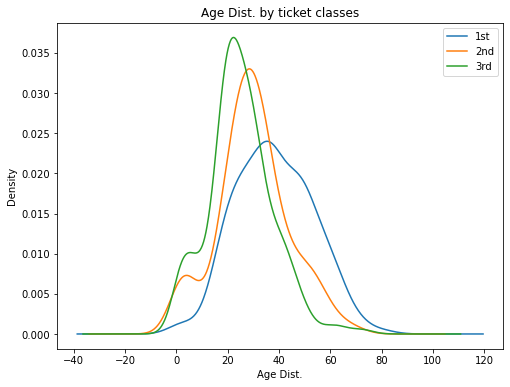

In [45]:
plt.figure(figsize = (8, 6))

train['Age'][train['Pclass'] == 1].plot(kind = 'kde')
train['Age'][train['Pclass'] == 2].plot(kind = 'kde')
train['Age'][train['Pclass'] == 3].plot(kind = 'kde')
plt.xlabel('Age Dist.')
plt.title('Age Dist. by ticket classes')
plt.legend(['1st', '2nd', '3rd'])
plt.show()

* **이제 Age의 누적생존률을 보고자 한다.**

In [46]:
# Age 2세 미만인 자 확인
train[train['Age']<2]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S,Master
165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S,Master
173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,NaN,S,Miss
184,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S,Master
306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,Master
382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.00,0,2,2653,15.7417,NaN,C,Miss
387,0,3,"Goodwin, Master. Sidney Leonard",male,1.00,5,2,CA 2144,46.9000,NaN,S,Master
470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C,Miss
645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C,Miss


In [47]:
# Age 2세 미만인 자 중 생존자의 합
train[train['Age']<2]['Survived'].sum()

12

In [48]:
# Age 2세 미만인 자 전체 수
train[train['Age']<2]['Survived'].count()

14

In [49]:
train[train['Age']<2]['Survived'].sum() /train[train['Age']<2]['Survived'].count()

0.8571428571428571

* **즉, sum / count를 하면 2세 미만인 자의 생존률을 알 수 있다.**
    * 이 수식을 토대로, for문을 이용하여 Age의 누적 생존률을 시각화로 표현

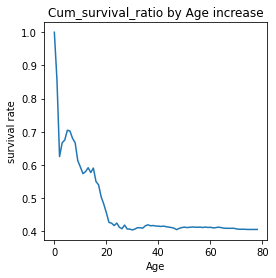

In [50]:
cum_survival_ratio = []

for i in range(1, 80):
    cum_survival_ratio.append(train[train['Age'] < i]['Survived'].sum()
                             / train[train['Age']<i]['Survived'].count())
    
plt.figure(figsize = (4, 4))
plt.plot(cum_survival_ratio)
plt.title('Cum_survival_ratio by Age increase')
plt.xlabel('Age')
plt.ylabel('survival rate')

plt.show()

* **나이가 증가할수록 생존률이 낮아짐**
* **생존률은 약 15세 근방을 전 후로 급격히 하락함**

### step3: 결측치 관련 ideation
* Age의 평균 또는 중앙값을 쓰면 될 것으로 보임
* 그러나 남성/여성의 생존률, 또는 Title별 생존률을 구분할 수 있으므로 이 성별별 또는 Title별 평균나이로 대체하는 것이 더 좋을 것

## Age 결론: 
* **feature로 사용 시 모델성능에 긍정적일 것**
* **모델에 학습시킬 수 있도록 추후 15세 전후로 나눠서 one-hot encoding 필요해 보임**

## ※ Pclass & Sex & Age - violin plot
* **seaborn의 violinplot을 통해 x별 y별 생존상태를 직관적으로 확인**
* **Pcass & Age: 모든 클래스에서 나이가 어릴수록 생존이 많음**
* **Sex & Age: 여성의 생존이 많음**

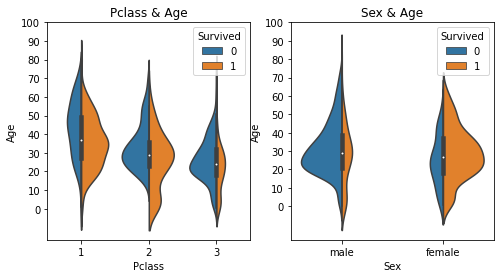

In [51]:
fig, ax = plt.subplots(1, 2, figsize = (8, 4))

sns.violinplot('Pclass', 'Age', hue = 'Survived', data = train, scale = 'count', split = True, ax= ax[0])
ax[0].set_title('Pclass & Age')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot('Sex', 'Age', hue = 'Survived', data = train, scale = 'count', split = True, ax= ax[1])
ax[1].set_title('Sex & Age')
ax[1].set_yticks(range(0, 110, 10))


plt.show()

## 2-5. SibSp + Parch
* **Siblings, Spouse, Parents, Children**
* **이를 합쳐서 동승자의 수에 따른 생존률을 분석할 것. 유의미하다면 feature로 사용할 것**

In [52]:
# 혼자 탑승한 사람은 Familysize가 1이 되도록 1을 더해줌
# 추후 사용할 수 있도록 test data도 동일하게 변경해 줘야 함

train['Familysize'] = train['SibSp'] + train['Parch'] + 1
test['Familysize'] = test['SibSp'] + test['Parch'] + 1

In [53]:
train[['Name','Familysize']].head(1)

,Name,Familysize
PassengerId,,
1,"Braund, Mr. Owen Harris",2


<AxesSubplot:xlabel='Familysize', ylabel='count'>

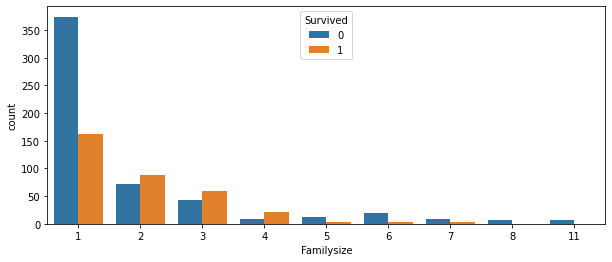

In [54]:
plt.figure(figsize = (10, 4))
sns.countplot(data = train, x = 'Familysize', hue = 'Survived')

* **가족은 최대 11명의 가족으로 구성됨**
    * 혼자 탑승한 사람의 생존 수가 월등히 적음
    * 2~4인 가족의 생존이 많은 편
    * 5인 이상의 가족은 생존보다 사망이 많음

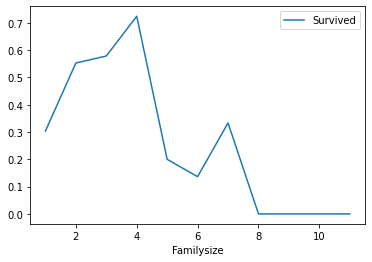

In [55]:
pd.pivot_table(train, index = 'Familysize', values = 'Survived').plot()

plt.show()

In [56]:
pd.pivot_table(train, index = 'Familysize', values = 'Survived')

,Survived
Familysize,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


* **확률적으로 봐도, 4인가족까지는 생존률이 증가하다가 5인가족부터 급격히 생존률이 감소함**
* **1인 가족, 2~4인 가족, 5인 이상 가족으로 구분하겠음**
    ```python
train.loc[boolean, column명] = '데이터' 
```

In [57]:
train.loc[train['Familysize'] == 1, 'Familytype'] = 'Single'
train.loc[(train['Familysize'] > 1) & (train['Familysize'] < 5), 'Familytype'] = 'Nuclear'
train.loc[train['Familysize'] >= 5, 'Familytype'] = 'Big'

train[['Familysize', 'Familytype']].head(10)

,Familysize,Familytype
PassengerId,,
1,2,Nuclear
2,2,Nuclear
3,1,Single
4,2,Nuclear
5,1,Single
6,1,Single
7,1,Single
8,5,Big
9,3,Nuclear


In [58]:
# train의 변경사항을 test에도 동일하게 반영해 준다

test.loc[test['Familysize'] == 1, 'Familytype'] = 'Single'
test.loc[(test['Familysize'] > 1) & (test['Familysize'] < 5), 'Familytype'] = 'Nuclear'
test.loc[test['Familysize'] >= 5, 'Familytype'] = 'Big'

test[['Familysize', 'Familytype']].head(10)

,Familysize,Familytype
PassengerId,,
892,1,Single
893,2,Nuclear
894,1,Single
895,1,Single
896,3,Nuclear
897,1,Single
898,1,Single
899,3,Nuclear
900,1,Single


In [59]:
pd.pivot_table(data = train, index='Familytype', values = 'Survived')

,Survived
Familytype,
Big,0.161290
Nuclear,0.578767
Single,0.303538


## SibSp + Parch 결론: 
* **Familytype으로 사용 시 모델성능에 긍정적일 것**
* **모델에 학습시킬 수 있도록 추후 one-hot encoding 필요해 보임**

## 2-6. Ticket
* **종류도 많고, 규칙도 없음**

In [60]:
train['Ticket'].value_counts()

1601        7
347082      7
CA. 2343    7
347088      6
CA 2144     6
           ..
PC 17609    1
2647        1
330932      1
PC 17603    1
243880      1
Name: Ticket, Length: 681, dtype: int64

In [61]:
train['Ticket'].isnull().sum()

0

## Ticket 결론: 
* **feature로 사용 시 모델성능에 엄청나게 부정적일 것**

## 2-7. Fare
* **Age와 같은 연속형 변수이므로 비슷하게 분석. 또는 Pclass 등과 상관관계 및 이에 따른 사망과의 인과관계 분석**
    * step1: Fare의 통계량 확인
    * step2: Fare와 다른 변수를 함께 분석
    * step3: Fare의 분포 확인
    * step4: 아웃라이어 처리 방법

### step1: Fare의 통계량 확인 
* Fare의 평균은 32인데 median은 14.45, 최대값이 512이다. 이는 Fare의 분포가 굉장히 한쪽으로 치우쳐져 있음을 알 수 있다.
    * 차이가 나는 원인을 다른 변수와 함께 보면서 확인할 수 있다.
    * Fare는 탑승요금이므로 Pclass와 연관이 있을 것으로 판단된다.

In [62]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

### step2: 다른 변수와 함께 분석

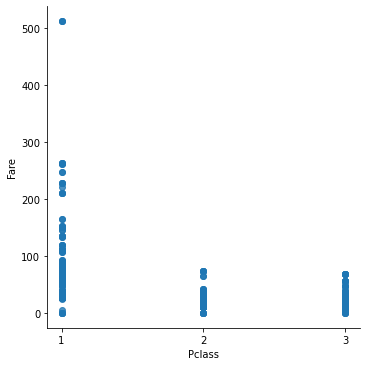

In [63]:
sns.lmplot(data = train, x = 'Pclass', y = 'Fare', fit_reg = False)   # 굳이 회귀선을 그릴 필요가 없다.
plt.xticks([1, 2, 3])
plt.show()

* **lmplot을 통해 Pclass별로 비교해보면,**
    * Pclass 1의 Fare가 굉장히 다양하게 퍼져 있음을 알 수 있다.
    * 1등급 Fare의 평균은 아래와 같이 84 부근인데, 이 윗단계를 아웃라이어로 간주하고 100 ~ 200, 200 ~ 300, 500이상 으로 추려보면 다음과 같다.

In [64]:
# Fare의 Pclass별 평균
pd.pivot_table(data = train, index = 'Pclass', values = 'Fare', margins = True)

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550
All,32.204208


In [65]:
# Pclass별 인원 수
pd.pivot_table(data = train, index = 'Pclass', values = 'Fare', aggfunc = 'count', margins = True)

,Fare
Pclass,
1,216
2,184
3,491
All,891


In [66]:
# Fare 500 이상인 사람의 수
len(train[train['Fare'] > 500])

3

In [67]:
# Fare 200 - 300 인 사람의 수
len(train[(train['Fare'] > 200) & (train['Fare'] < 300)])

17

In [68]:
# Fare 100 - 200 인 사람의 수
len(train[(train['Fare'] > 100) & (train['Fare'] < 200)])

33

In [69]:
print((3 + 17 + 33) / 216)   # 1등급내에서 1등급 평균 Fare 이상인 자의 비중
print((3 + 17 + 33) / 891)   # 전체에서 1등급 평균 Fare 이상인 자의 비중

0.24537037037037038
0.05948372615039282


* 같은 등급 내에서도 아웃라이어들은 24.5%이며, 전체에서도 아웃라이어는 약 6%밖에 안 된다.
* 우선 Fare 100이하의 데이터들만 추려서 다시 lmplot을 통해 생존과의 연관성을 비교해보자.

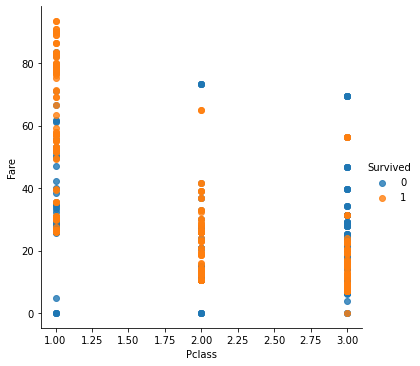

In [70]:
sns.lmplot(data = train[train['Fare'] < 100], x = 'Pclass', y = 'Fare',
          hue = 'Survived', fit_reg = False)

* 이렇게 봐서는 Fare의 크기에 따른 생존분포를 한눈에 보기가 힘들다.
    * Pclass가 명목형 변수이기 때문에 그런 것이며, 
    * 산점도의 특성을 잘 나타낼 수 있도록 x축 역시 연속형 변수로 바꿔주면 된다.(여기서는 Age로 바꿔보면 좋을 것)

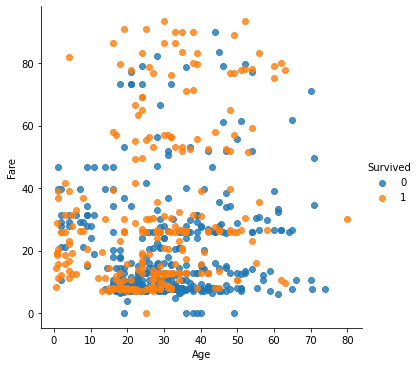

In [71]:
sns.lmplot(data = train[train['Fare'] < 100], x = 'Age', y = 'Fare',
          hue = 'Survived', fit_reg = False)

* Fare가 20이 넘어가면 어느정도 생존률이 높아짐을 파악할 수 있다.

### step3: Fare의 분포 확인
* 히스토그램을 통해서 분포의 치우침 정도를 확인할 수 있다.(skewness)
* 아래와 같이 시각화한 결과, Fare의 skewness가 굉장히 높음을 알 수 있다.
    * 이 경우 모델에 그대로 넣으면 성능을 굉장히 떨어뜨릴 수 있다.

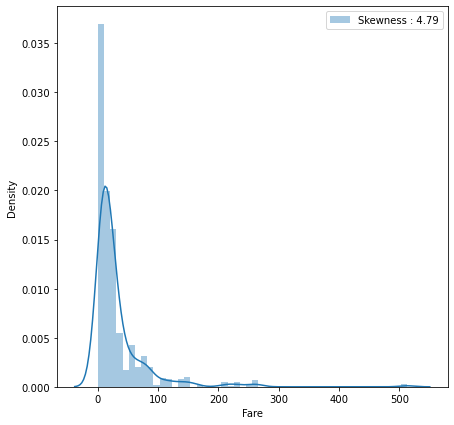

In [72]:
plt.figure(figsize = (7, 7))

sns.distplot(train['Fare'], label='Skewness : {:.2f}'.format(train['Fare'].skew())).legend()
plt.show()

## Fare 결론: 
* **feature로 그대로 사용 해도 Decision Tree는 자동으로 구간을 지정할 것임**


* **그러나 기본적으로 outlier가 명백히 존재하는 feature를 그대로 넣는 것은 좋은 방법이 아니라고 판단됨**


* **Feature engineering 단계에서 아래 중 하나를 택하여 진행할 것**
    * 방법1. 결과값에 로그를 씌워 정규화한 값을 Fare 컬럼에 대체하여(또는 컬럼을 새로 만들어서) 사용
    * 방법2. 구간으로 나눈 뒤 0, 1, 2, 3, ... 으로 구분하거나 one-hot encoding을 함

## 2-8. Cabin
* **Cabin의 결측치 비율은 train data와 test data 모두 약 80%를 차지함**
* **또한 그에 해당하는 종류도 굉장히 다양함**
    * 그러나 자세히 보면 Cabin은 하나의 영문이니셜과 숫자로 이루어져 있기 때문에 이 역시 살펴볼 필요가 있다고 판단됨

In [73]:
train['Cabin'].isnull().sum() / len(train)

0.7710437710437711

In [74]:
test['Cabin'].isnull().sum() / len(test)

0.7822966507177034

In [75]:
train['Cabin'].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [76]:
train.describe(include = [object])

,Name,Sex,Ticket,Cabin,Embarked,Title,Familytype
count,891,891,891,204,889,891,891
unique,891,2,681,147,3,5,3
top,"Garfirth, Mr. John",male,1601,B96 B98,S,Mr,Single
freq,1,577,7,4,644,517,537


In [77]:
train['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
F33            3
F2             3
              ..
E12            1
B30            1
C118           1
F E69          1
F G63          1
Name: Cabin, Length: 147, dtype: int64

In [78]:
train["Cabin"].str[0].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

<AxesSubplot:xlabel='Cabin', ylabel='count'>

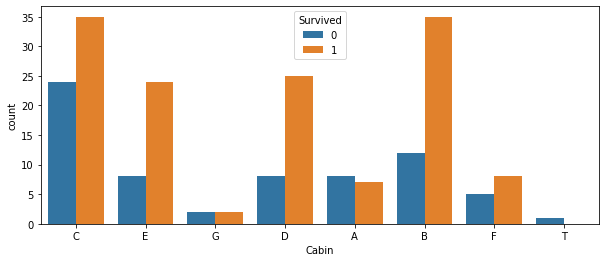

In [79]:
plt.figure(figsize = (10, 4))
sns.countplot(data = train, x = train['Cabin'].str[0], hue = 'Survived')

In [80]:
pd.pivot_table(data = train, index = ['Pclass', train['Cabin'].str[0]], values = 'Survived', margins = True)

Survived
Pclass Cabin          
1      A      0.466667
       B      0.744681
       C      0.593220
       D      0.758621
       E      0.720000
       T      0.000000
2      D      0.750000
       E      0.750000
       F      0.875000
3      E      1.000000
       F      0.200000
       G      0.500000
All           0.383838

* **영문이니셜로 나누고 countplot을 적용하면, 거의 모든 Cabin에서 생존율이 높게 나옴**
* **또한 Pclass별 Cabin별 생존률을 살펴 보아도, 엄청 유의미한 규칙성은 발견되지 않음**

## Cabin 결론: 
* **feature로 사용하지 않겠음(필요없는 컬럼은 과감히 버리는 것도 중요함)**
* 미사용 근거: 
    * Cabin의 결측치 비율을 감안하면 어떻게든 결측치를 채워야만 하는데, Pclass로 결측치 대체 방법을 고민할 수 있겠지만 어차피 Pclass를 feature로 사용하기 때문에 결측치를 채우더라도 Cabin이 갖고 있는 unique contribution은 존재하지 않을 것
    * Cabin의 이니셜이 지나치게 다양하기 때문에 어떤 결측치 행에 어떤 이니셜을 넣을 지 기준이 서지 않음

## 2-9. Embarked
* **선착장별 생존률을 분석하여 유의미하다면 feature로 사용할 것**
    * **참고**: 타이타닉 호 사고 당일 운항 일정은 사우스햄튼(S) --> 쉘부르(C) --> 퀸즈타운(Q) 순으로 이동, 이후 대서양 횡단 중 침몰함
    

* **다음과 같이 살펴볼 것**
    1. Embarked 별 탑승객 수
    1. Embarked 별 Sex
    1. Embarked 별 Survived
    1. Embarked 별 Pclass

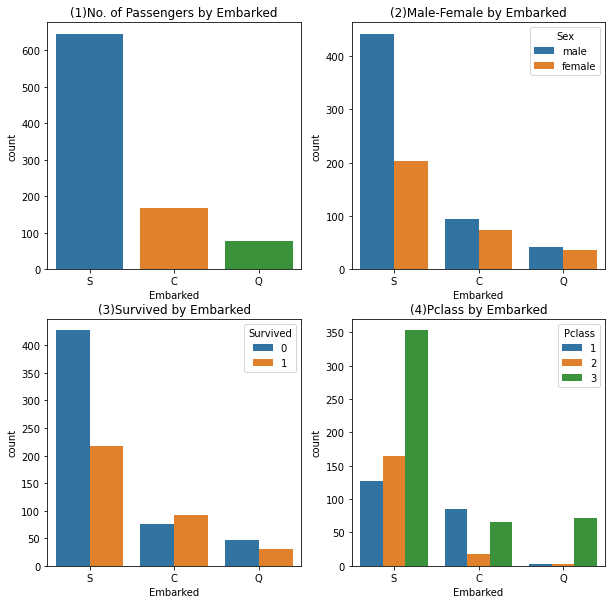

In [81]:
fig, ax = plt.subplots(2, 2, figsize = (10, 10))

sns.countplot('Embarked', data = train, ax = ax[0,0])
ax[0,0].set_title('(1)No. of Passengers by Embarked')

sns.countplot('Embarked', hue = 'Sex', data = train, ax = ax[0,1])
ax[0,1].set_title('(2)Male-Female by Embarked')

sns.countplot('Embarked', hue = 'Survived', data = train, ax = ax[1,0])
ax[1,0].set_title('(3)Survived by Embarked')

sns.countplot('Embarked', hue = 'Pclass', data = train, ax = ax[1,1])
ax[1,1].set_title('(4)Pclass by Embarked')

plt.show()

1. Embarked 별 탑승객 수
    * 최초 출발지인 S에서 탑승자 수가 월등히 많음. 이후 Embarked 순서대로
2. Embarked 별 Sex
    * S에서의 남성이 월등히 많음
3. Embarked 별 Survived
    * S에서의 사망률이 월등히 높음
4. Embarked 별 Pclass
    * S의 높은 사망률은 S에 3등급 승객이 많다는 점과 연관이 있을 것으로 판단
    * C에서 생존률이 높은 것은 C에 1등급 승객이 많다는 점과 연관이 있을 것으로 판단

In [82]:
pd.pivot_table(train, index = 'Embarked', values = 'Survived')

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


## Embarked 결론: 
* **Embarked별로 생존률이 다름을 알 수 있으므로 유의미한 feature가 될 것**
* **feature engineering 시 one-hot encoding을 통해 적용해야 함**

# 3. Preprocessing(전처리)

* **변수별 EDA결과 요약 및 전처리 계획**

    * ```Pclass```: 등급별 생존률 의미 있었음
        * 숫자형으로 되어 있으므로 추가 처리 없이 그대로 사용할 것         
        
    * ```Name```: Title로 구분 시 특히 Master의 생존률이 의미있었음. 아래 전처리 중 택일
        * 방법 1: one-hot encoding으로 더미변수 생성 후 사용 또는 label-encoding하여 사용
        * 방법 2: Master 변수를 새롭게 생성하여 Master와 Master가 아닌 것들만 True / False로 구분 후 사용        
        
    * ```Sex```: 성별별 생존률 의미있었음
        * data type을 0, 1의 형태로 바꾸어 feature로 사용할 것
    * ```Age```: 나이가 증가할수록 생존률이 급격히 줄어듬(특히 약 15세 전후 차이 두드러짐)
        * 방법 1: Child 변수를 새롭게 생성하여 15세를 기준으로 True / False로 구분 후 사용
        * 방법 2: 결측치가 있는 행의 Title을 보고, 해당 Title별 median 또는 mean 값으로 대체 후 사용
    
    * ```SibSp```, ```Parch```: Familysize로 구분 시 의미있었음
        * one-hot encoding으로 더미변수 생성 후 사용
    
    * ```Ticket```: 버림  
    
    * ```Fare```: Fare가 높을수록 생존률이 높아짐. 의미 있었음
        * outlier가 있으므로, 개별 데이터에 로그를 취한 후 사용
    
    * ```Cabin```: 버림
    
    * ```Embarked```: 선착장별 생존률 의미있었음 
        * one-hot encoding으로 더미변수 생성 후 사용

## 3-1. null data 및 outlier 처리 

### 3-1.1 Age 컬럼 null data 처리
* train의 177개, test의 86개 null data를 title별 mean으로 대체할 것
* AgeNew 컬럼을 생성하여 이를 반영할 것

In [83]:
train['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [84]:
pd.pivot_table(train, index = 'Title', values = 'Age')

,Age
Title,
Master,4.574167
Miss,21.773973
Mr,32.368090
Mrs,35.898148
Other,42.384615


In [85]:
train.loc[(train['Age'].isnull()) & (train['Title'] == 'Master'), 'AgeNew'] = 5
train.loc[(train['Age'].notnull()) & (train['Title'] == 'Master'), 'AgeNew'] = train['Age']

train.loc[(train['Age'].isnull()) & (train['Title'] == 'Miss'), 'AgeNew'] = 22
train.loc[(train['Age'].notnull()) & (train['Title'] == 'Miss'), 'AgeNew'] = train['Age']

train.loc[(train['Age'].isnull()) & (train['Title'] == 'Mr'), 'AgeNew'] = 32
train.loc[(train['Age'].notnull()) & (train['Title'] == 'Mr'), 'AgeNew'] = train['Age']

train.loc[(train['Age'].isnull()) & (train['Title'] == 'Mrs'), 'AgeNew'] = 36
train.loc[(train['Age'].notnull()) & (train['Title'] == 'Mrs'), 'AgeNew'] = train['Age']

train.loc[(train['Age'].isnull()) & (train['Title'] == 'Other'), 'AgeNew'] = 42
train.loc[(train['Age'].notnull()) & (train['Title'] == 'Other'), 'AgeNew'] = train['Age']

In [86]:
# 10개 정도를 추려서, 잘 반영되었는지 확인
train[train['Age'].isnull()].head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Familysize,Familytype,AgeNew
PassengerId,,,,,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr,1,Single,32.0
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,Mr,1,Single,32.0
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,Mrs,1,Single,36.0
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,Mr,1,Single,32.0
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,Miss,1,Single,22.0
30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S,Mr,1,Single,32.0
32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,Mrs,2,Nuclear,36.0
33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,Miss,1,Single,22.0
37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,Mr,1,Single,32.0


* train 데이터의 변경사항을 test에도 동일하게 적용한다.

In [87]:
test['Age'].isnull().value_counts()

False    332
True      86
Name: Age, dtype: int64

In [88]:
test.loc[(test['Age'].isnull()) & (test['Title'] == 'Master'), 'AgeNew'] = 5
test.loc[(test['Age'].notnull()) & (test['Title'] == 'Master'), 'AgeNew'] = test['Age']

test.loc[(test['Age'].isnull()) & (test['Title'] == 'Miss'), 'AgeNew'] = 22
test.loc[(test['Age'].notnull()) & (test['Title'] == 'Miss'), 'AgeNew'] = test['Age']

test.loc[(test['Age'].isnull()) & (test['Title'] == 'Mr'), 'AgeNew'] = 32
test.loc[(test['Age'].notnull()) & (test['Title'] == 'Mr'), 'AgeNew'] = test['Age']

test.loc[(test['Age'].isnull()) & (test['Title'] == 'Mrs'), 'AgeNew'] = 36
test.loc[(test['Age'].notnull()) & (test['Title'] == 'Mrs'), 'AgeNew'] = test['Age']

test.loc[(test['Age'].isnull()) & (test['Title'] == 'Other'), 'AgeNew'] = 42
test.loc[(test['Age'].notnull()) & (test['Title'] == 'Other'), 'AgeNew'] = test['Age']

In [89]:
# 10개 정도를 추려서, 잘 반영되었는지 확인
test[test['Age'].isnull()].head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Familysize,Familytype,AgeNew
PassengerId,,,,,,,,,,,,,,
902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S,Mr,1,Single,32.0
914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S,Mrs,1,Single,36.0
921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C,Mr,3,Nuclear,32.0
925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Mrs,4,Nuclear,36.0
928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S,Miss,1,Single,22.0
931,3,"Hee, Mr. Ling",male,NaN,0,0,1601,56.4958,NaN,S,Mr,1,Single,32.0
933,1,"Franklin, Mr. Thomas Parham",male,NaN,0,0,113778,26.5500,D34,S,Mr,1,Single,32.0
939,3,"Shaughnessy, Mr. Patrick",male,NaN,0,0,370374,7.7500,NaN,Q,Mr,1,Single,32.0
946,2,"Mangiavacchi, Mr. Serafino Emilio",male,NaN,0,0,SC/A.3 2861,15.5792,NaN,C,Mr,1,Single,32.0


### 3-1.2 Embarked 컬럼 null data 처리
* train에만 2개의 결측치가 있음
* 굉장히 nominal한 개수이므로 가장 탑승객이 많았던 S로 대체하겠음

In [90]:
train['Embarked'].isnull().value_counts()

False    889
True       2
Name: Embarked, dtype: int64

In [91]:
test['Embarked'].isnull().value_counts()

False    418
Name: Embarked, dtype: int64

In [92]:
train['Embarked'].fillna('S', inplace = True)

train['Embarked'].isnull().value_counts()  # 결측치 잘 채워졌는지 검사

False    891
Name: Embarked, dtype: int64

### 3-1.3 Fare 컬럼 outlier 처리
* 기존의 분포를 보면 skewness가 굉장히 큰 것을 알 수 있었음
* 이를 그대로 모델에 적용할 경우, 몇 개 없는 아웃라이어(Fare 100 이상은 53개로 전체의 약 5.9%)에 민감하게 반응할 수 있음
* 따라서 Fare 컬럼의 모든 값(0 제외)에 log를 취해줄 것임


* test data의 null data 1개는 간단히 Fare의 평균으로 대체

In [93]:
train['Fare'].isnull().value_counts()

False    891
Name: Fare, dtype: int64

In [94]:
test.Fare.isnull().value_counts()

False    417
True       1
Name: Fare, dtype: int64

In [95]:
test.Fare.mean()

35.6271884892086

In [96]:
test['Fare'].fillna(36, inplace = True)  # 평균값으로 null data 채우기

test['Fare'].isnull().value_counts()  # 결측치 잘 채워졌는지 검사

False    418
Name: Fare, dtype: int64

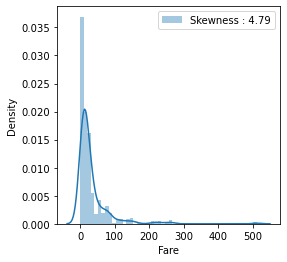

In [97]:
plt.figure(figsize = (4, 4))

sns.distplot(train['Fare'], label='Skewness : {:.2f}'.format(train['Fare'].skew())).legend()
plt.show()

* **아래와 같이 map과 lambda함수를 이용하여 Fare 값에 전부 로그를 취함**

In [98]:
train['Fare'] = train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

test['Fare'] = test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

* **다시 히스토그램을 시각화 해보면, 비대칭성이 상당히 개선됨을 볼 수 있음**

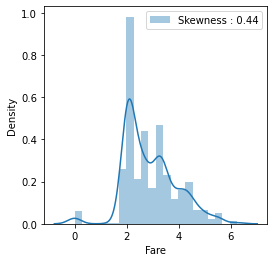

In [99]:
plt.figure(figsize = (4, 4))

sns.distplot(train['Fare'], label='Skewness : {:.2f}'.format(train['Fare'].skew())).legend()
plt.show()

* **Fare컬럼의 통계량들을 봐도 상당히 개선되었음을 알 수 있음**

In [100]:
train['Fare'].describe()

count    891.000000
mean       2.893846
std        1.002899
min        0.000000
25%        2.068177
50%        2.670985
75%        3.433987
max        6.238967
Name: Fare, dtype: float64

## 3-2. Feature Engineering
[Label Encoding을 할지, One-Hot Encoding을 할지 참고](https://azanewta.tistory.com/46)

* label encoding의 경우 숫자의 대소관계 특성이 반영되기 때문에 회귀분석과 관련한 머신러닝 알고리즘에는 적용하지 않는 게 좋다
    * tree 계열의 알고리즘은 숫자의 대소관계 특성이 반영되지 않으므로 label encoding해도 괜찮음 

* 싸이킷런을 이용히여 ```명목형변수```의 Label encoding 하기(연속형변수는 이걸 사용하면 안되니 혼동 주의)

```python
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()   # 임의의 label_encoder라는 변수에 함수를 할당
label_encoder.fit_transform(train['변수명'])
```

### 3-2.1 Title 
* category가 5개 이므로 오히려 label encoding이 효율적일 수 있겠다 판단됨

In [101]:
train['Title'].unique(), train['Title'].value_counts()

(array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object),
 Mr        517
 Miss      182
 Mrs       125
 Master     40
 Other      27
 Name: Title, dtype: int64)

In [102]:
test['Title'].unique(), test['Title'].value_counts()

(array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object),
 Mr        240
 Miss       78
 Mrs        72
 Master     21
 Other       7
 Name: Title, dtype: int64)

In [103]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [104]:
train['Title_encode'] = label_encoder.fit_transform(train['Title'])
train['Title_encode'].unique(),train['Title_encode'].value_counts() 

(array([2, 3, 1, 0, 4]),
 2    517
 1    182
 3    125
 0     40
 4     27
 Name: Title_encode, dtype: int64)

In [105]:
test['Title_encode'] = label_encoder.fit_transform(test['Title'])
test['Title_encode'].unique(),test['Title_encode'].value_counts() 

(array([2, 3, 1, 0, 4]),
 2    240
 1     78
 3     72
 0     21
 4      7
 Name: Title_encode, dtype: int64)

### 3-2.2 Sex 
* label encoding.

In [133]:
train['Sex_encode'] = label_encoder.fit_transform(train['Sex'])
train['Sex_encode'].unique(), train['Sex_encode'].value_counts()

test['Sex_encode'] = label_encoder.fit_transform(test['Sex'])
test['Sex_encode'].unique(), test['Sex_encode'].value_counts()

(array([1, 0]),
 1    266
 0    152
 Name: Sex_encode, dtype: int64)

### 3-2.3 Familytype 
* label encoding

In [166]:
train['Familytype'] = label_encoder.fit_transform(train['Familytype'])
train['Familytype'].unique(), train['Familytype'].value_counts()

(array([1, 2, 0]),
 2    537
 1    292
 0     62
 Name: Familytype, dtype: int64)

In [167]:
test['Familytype'] = label_encoder.fit_transform(test['Familytype'])
test['Familytype'].unique(), test['Familytype'].value_counts()

(array([2, 1, 0]),
 2    253
 1    145
 0     20
 Name: Familytype, dtype: int64)

### 3-2.4 Embarked
* label encoding

In [183]:
train['Embarked_encode'] = label_encoder.fit_transform(train['Embarked'])
train['Embarked_encode'].unique(), train['Embarked_encode'].value_counts()

(array([2, 0, 1]),
 2    646
 0    168
 1     77
 Name: Embarked_encode, dtype: int64)

In [184]:
test['Embarked_encode'] = label_encoder.fit_transform(test['Embarked'])
test['Embarked_encode'].unique(), test['Embarked_encode'].value_counts()

(array([1, 2, 0]),
 2    270
 0    102
 1     46
 Name: Embarked_encode, dtype: int64)

### 3-2.5 AgeNew
* 15세를 기준으로 True/False로 값을 반환하는 'Child'컬럼을 새로 만들어 사용

In [123]:
train['Child'] = train['AgeNew'] < 15
train[['AgeNew', 'Child']].head(10)

,AgeNew,Child
PassengerId,,
1,22.0,False
2,38.0,False
3,26.0,False
4,35.0,False
5,35.0,False
6,32.0,False
7,54.0,False
8,2.0,True
9,27.0,False


In [124]:
test['Child'] = test['AgeNew'] < 15
test[['AgeNew', 'Child']].head(10)

,AgeNew,Child
PassengerId,,
892,34.5,False
893,47.0,False
894,62.0,False
895,27.0,False
896,22.0,False
897,14.0,True
898,30.0,False
899,26.0,False
900,18.0,False


# 4. Model building

## 4-1. Data 준비
* **Tree 학습을 위해 필요한 데이터: Tree는 지도학습이므로 인풋변수와 아웃풋 변수가 모두 필요**
    * Target변수: Label 또는 Class라고도 함. 맞춰야 하는 정답 변수이며, 여기서는 Survived가 이에 해당함
    * Feature: Survived를 맞추는 데 도움이 되는 인풋 변수들. 전부 다 쓸 수도 있고 선택해서 넣을 수도 있음


* **train 데이터와 test 데이터를 아래와 같이 나눔**
    * **```train_X```**: train 데이터의 feature
    * **```train_y```**: train 데이터의 Target변수
    * **```test_X```**: test 데이터의 feature. train_X와 동일하게 사용해야 함
    

* **이후의 기본 절차**: train_X와 train_y를 학습에 사용하여 모델을 만든 뒤, 이 모델에 test_X를 넣어 test_y를 예측함

In [125]:
train.shape, test.shape  # 다시 한 번 컬럼 수 확인. test데이터는 Survived가 없으므로 train보다 컬럼수가 하나 적음

((891, 25), (418, 24))

In [126]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Title', 'Familysize', 'Familytype',
       'AgeNew', 'Title_encode', 'Female', 'Male', 'Big', 'Nuclear', 'Single',
       'C', 'Q', 'S', 'Child'],
      dtype='object')

* **연구자가 넣고자 하는 feature들에 대해 미리 상관계수를 확인하는 것이 좋다.**
    * 상관계수: 피어슨 상관계수로 -1과 1 사이
    * Corr = 1: 완전 선형 상관관계
    * corr = 0: 무상관 (독립이라는 의미는 아님)
    * Corr = -1: 완전 선형 반상관관계
    
* **만약 서로 다른 변수가 1 또는 -1의 상관관계를 갖고 있다면 둘 중 하나를 제거하거나, 둘을 합친 정보를 제공하는 feature를 만드는 것이 좋다.**
* **사례:** 
    * 원래는 'Sex'를 원핫인코딩을 수행하여 'Male', 'Female'의 두 컬럼을 가졌음.
    * 이를 히트맵 데이터에 넣고 상관계수를 보니 'Male', 'Female'의 상관계수가 -1이 나옴.
    * 따라서 두 컬럼 대신에 'Sex_encode'라는 새 컬럼에 성별 별로 0, 1로 인코딩하도록 성별 정보를 하나로 합쳤음.

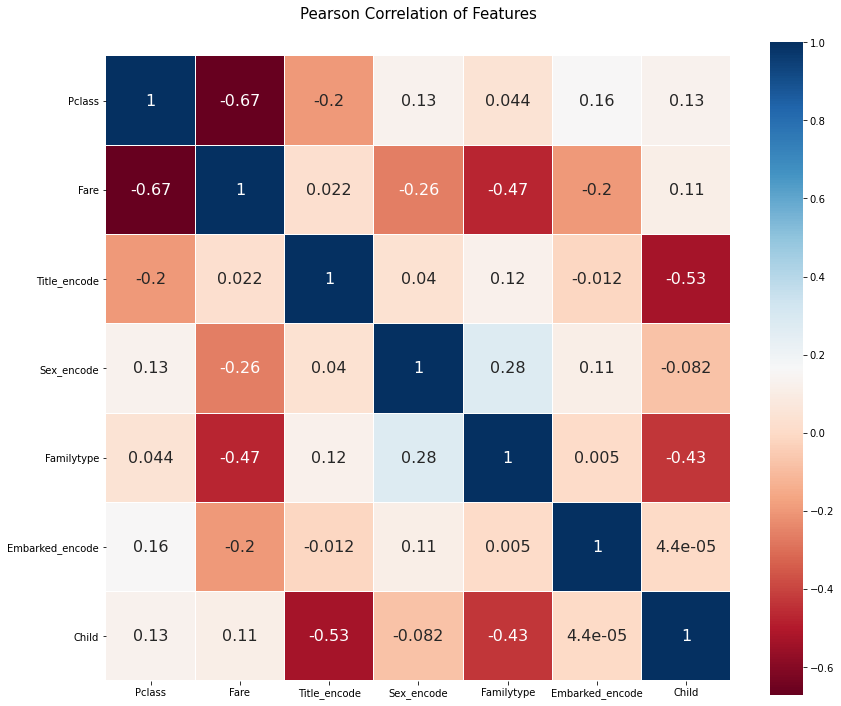

In [211]:
heatmap_data = train[['Pclass', 'Fare', 'Title_encode',
                 'Sex_encode', 'Familytype','Embarked_encode', 'Child']]

colormap = plt.cm.RdBu
plt.figure(figsize = (14, 12))
plt.title('Pearson Correlation of Features', y = 1.05, size = 15)

sns.heatmap(heatmap_data.astype(float).corr(), linewidth = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = 'white', annot = True, annot_kws = {"size" : 16})

plt.show()
del heatmap_data

In [212]:
# 본인의 생각에 따라 feature를 결정하여 아래와 같이 할당
feature_names = ['Pclass', 'Fare', 'Title_encode',
                 'Familytype','Embarked_encode', 'Sex_encode', 'Child']

In [213]:
label_name = 'Survived'

In [214]:
train_X = train[feature_names]
print(train_X.shape)
train_X.head()

(891, 7)


,Pclass,Fare,Title_encode,Familytype,Embarked_encode,Sex_encode,Child
PassengerId,,,,,,,
1,3,1.981001,2,1,2,1,False
2,1,4.266662,3,1,0,0,False
3,3,2.070022,1,2,2,0,False
4,1,3.972177,3,1,2,0,False
5,3,2.085672,2,2,2,1,False


In [215]:
train_y = train[label_name]
print(train_y.shape)
train_y.head()

(891,)


PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [216]:
test_X = test[feature_names]
print(test_X.shape)
test_X.head()

(418, 7)


,Pclass,Fare,Title_encode,Familytype,Embarked_encode,Sex_encode,Child
PassengerId,,,,,,,
892,3,2.057860,2,2,1,1,False
893,3,1.945910,3,1,2,0,False
894,2,2.270836,2,2,1,1,False
895,3,2.159003,2,2,2,1,False
896,3,2.508582,3,1,2,0,False


## 4-2. Cross-validation
* **막바로 Tree 학습하고 test_y를 예측하고 끝내기 전에 해당 모델의 성능을 먼저 파악하는 것이 좋음**


* **train_X와 train_y를 일정 비율로 아래와 같이 분류. 만약 7:3으로 분류한다면,**
    * **```X_tr```**: train_X의 70%
    * **```X_val```**: train_X의 30%
    * **```y_tr```**: train_y의 70%
    * **```y_val```**: train_y의 30%
    
    
* **이후의 절차:** 
    * X_tr과 y_tr로 모델 학습
    * 해당 모델에 X_val을 넣어 y를 예측
    * 예측한 y의 값들과 실제 y_val의 값들을 비교하여 정확도 평가

In [141]:
from sklearn.ensemble import RandomForestClassifier   # 랜덤포레스트 패키지
from sklearn import metrics   # 모델 정확도 계산 시 필요
from sklearn.model_selection import train_test_split   # 교차검증 세트 분리를 위한 패키지

In [235]:
# stratify = train_y: train_y내의 요소별 비율을 고려하여 split하라는 의미
# test_size = 0.3: 전체의 30%를 validation set으로 구성하라는 의미
X_tr, X_val, y_tr, y_val = train_test_split(train_X, train_y,
                                           stratify = train_y,
                                           test_size = 0.3,
                                           random_state = 12345)

In [236]:
print(X_tr.shape, X_val.shape, y_tr.shape, y_val.shape)

(623, 7) (268, 7) (623,) (268,)


In [237]:
model = RandomForestClassifier()    # 패키지를 model이라는 변수에 할당(굳이 안해도 되나 편의상 관례)
model.fit(X_tr, y_tr)               # fit 명령어를 통해 X_tr과 y_tr을 model에 학습시킴
pred_cv = model.predict(X_val)      # 학습한 model에 X_val을 넣어 y값 예측 후 pred_cv에 할당

In [238]:
pred_cv.shape

(268,)

In [239]:
metrics.accuracy_score(pred_cv, y_val)

0.8582089552238806

In [232]:
metrics.confusion_matrix(pred_cv, y_val)

array([[149,  22],
       [ 16,  81]], dtype=int64)

## 4-3. Feature importance 확인
* **학습된 모델에 부여된 feature별 가중치 확인**

In [233]:
feature_importance = model.feature_importances_
Series_feat_imp = pd.Series(feature_importance, index = train_X.columns)

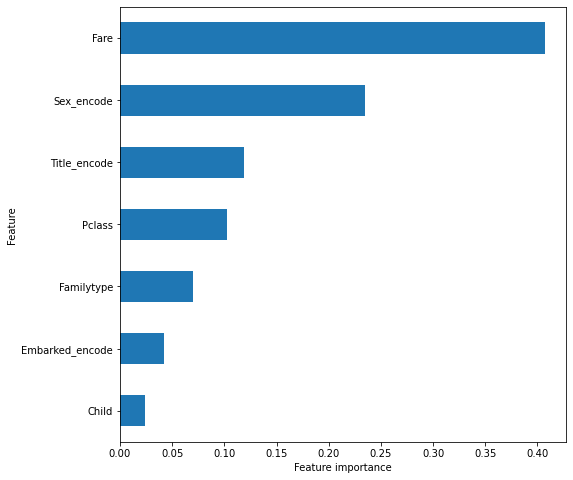

In [234]:
plt.figure(figsize = (8, 8))
Series_feat_imp.sort_values(ascending = True).plot.barh()

plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

# 5. Prediction

In [240]:
model.fit(train_X, train_y)

RandomForestClassifier()

In [241]:
prediction = model.predict(test_X)

# 6. Submission

In [242]:
submission = pd.read_csv('gender_submission.csv', index_col = 'PassengerId')

print(submission.shape)
submission.head()

(418, 1)


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [243]:
submission['Survived'] = prediction

In [244]:
submission.to_csv('5th_submission.csv')